In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


in tnis data we have categorical and contious both columns present and 8425 rows and 23 columns in which 1 is target like raintoday  and other are independent variables and there is two categories present in target so that we observe that this classification problem and treat with supervised ml model classifier

In [3]:
print('size of dataset ',df.shape)
print('\n')
print('rows : {} columns : {}'.format(df.shape[0],df.shape[1]))

size of dataset  (8425, 23)


rows : 8425 columns : 23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
# cheking theunique values present in data
for i in df.columns:
    print(df[i].unique(),df[i].dtypes)
    print(df[i].nunique(),'\n')

['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08'] object
3004 

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru'] object
12 

[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6  0.9  5.   3.9  3.4  0.  -1.5 -1.7
 -0.4  0.1  4.8  5.9  2.9 -0.6 -0.3 -1.

In [5]:
# seperate the object columns and numerical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')


#checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)


categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [3]:
# we see that location is unique identity or identifier so that we remove this columns
df.drop('Location',axis=1,inplace=True)
df.shape

(8425, 22)

In [4]:
# setting date as dataframe index
df.set_index('Date', inplace= True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# cheking missing valuespresent indata
df.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# lets fillthemissing values with the appropriate values by using  fillna method
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())                                            

In [16]:
for i in df:
    if df[i].dtypes=='object':
        print(df[i].unique())
        print(df[i].nunique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
16
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
16
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
16
['No' 'Yes' nan]
2
['No' 'Yes' nan]
2


In [7]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [8]:
#again checknulls
df.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
#checking the statistics of data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


#description given below of this dataset

1)there is no null values present in any of the columns hence its look like perfect 
2)the mean value of columns are well manner with proportion to median in some columns more differnce between max and 75% of dataset hence possibility to outlier present in these columns 
3)we have also notice std deviation and meean and 25% percentile values which is well manner 
4)the standard deviation of thedata islowerthan mean value hence its positive sign to our data is perfect for modeling

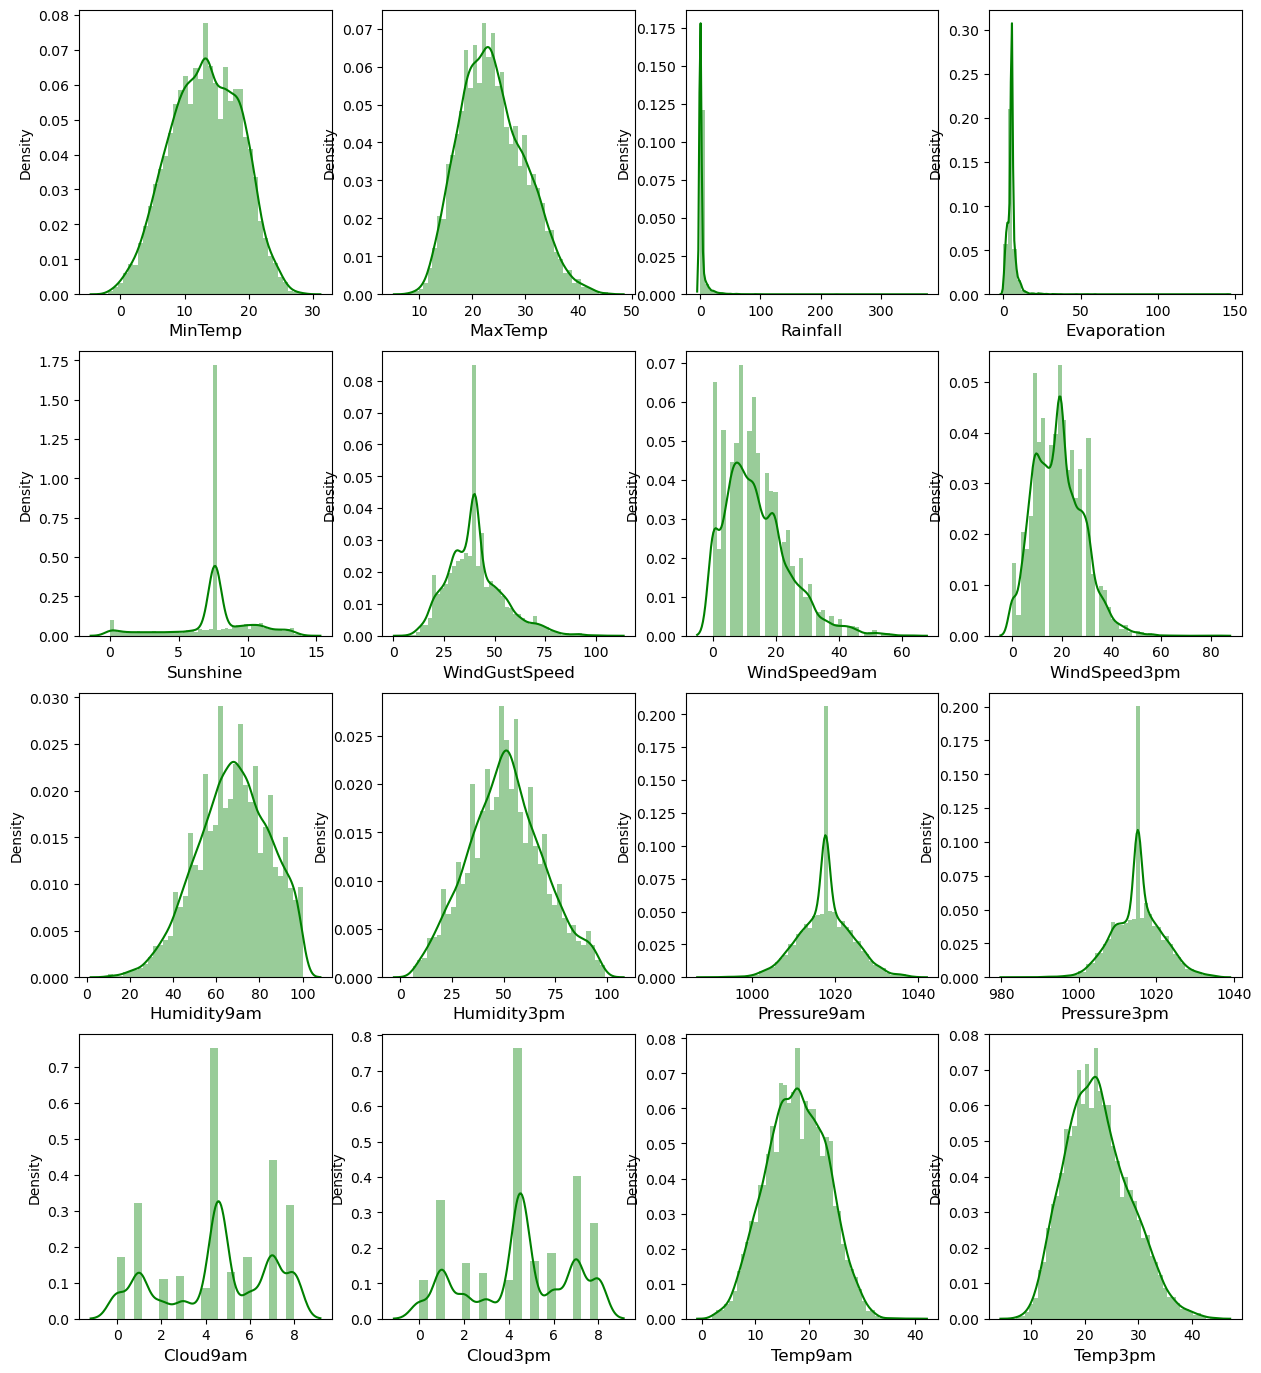

In [23]:
# checking the distribution through graph of data in each continuous coulmns
plt.figure(figsize=(15,17), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [9]:
# there are few more columns are skewed hence removing skewness of dataset
df.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [10]:
#apply cube root method to remove skewness in volume
df['Rainfall']= np.cbrt(df['Rainfall'])
df['Evaporation']= np.cbrt(df['Evaporation'])
df['WindSpeed9am']= np.cbrt(df['WindSpeed9am'])
df['WindGustSpeed']= np.cbrt(df['WindGustSpeed'])

In [11]:
df.skew()

MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         1.622698
Evaporation      0.176211
Sunshine        -0.716525
WindGustSpeed   -0.022921
WindSpeed9am    -1.220228
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
dtype: float64

In [27]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

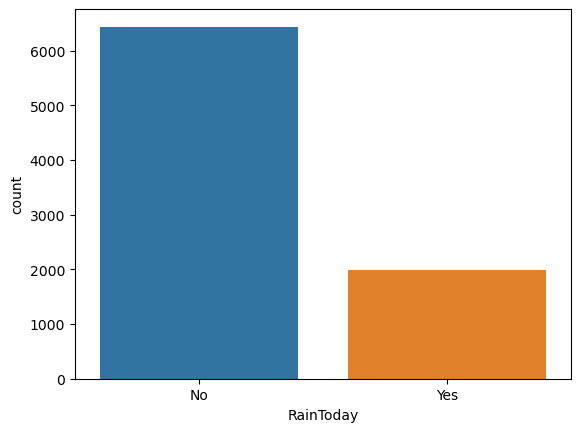

In [31]:
# data visualization
sns.countplot(x='RainToday',data=df)
plt.show()


N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


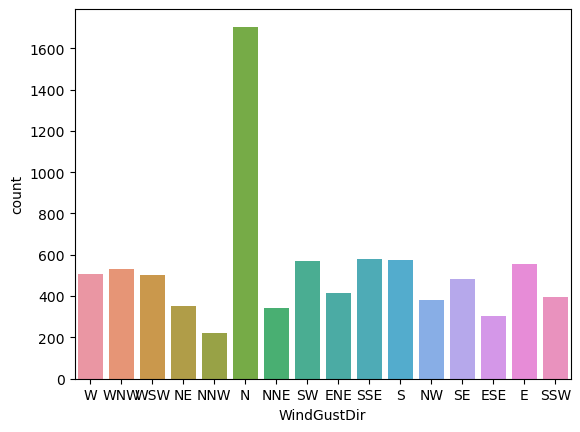

In [35]:
ax=sns.countplot(x='WindGustDir',data=df)
print(df['WindGustDir'].value_counts())

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


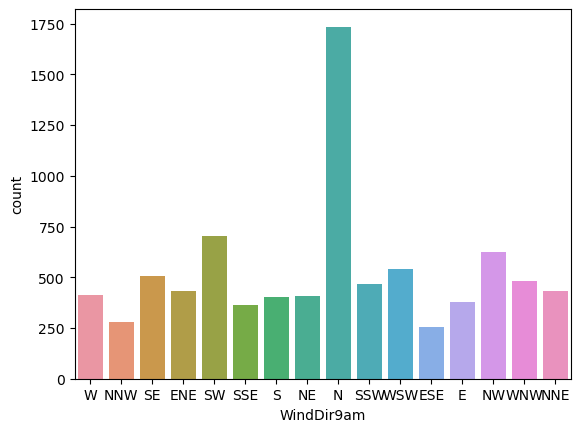

In [36]:
ax=sns.countplot(x='WindDir9am',data=df)
print(df['WindDir9am'].value_counts())

<Figure size 400x400 with 0 Axes>

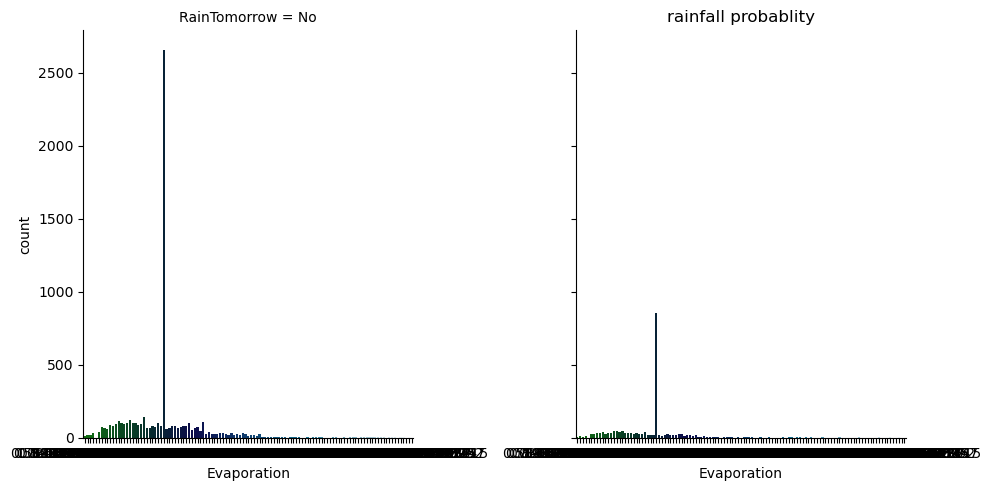

In [47]:
plt.figure(figsize=(4,4))
ax=sns.catplot(x='Evaporation',col='RainTomorrow',data=df,kind='count',palette='ocean')
plt.xlabel('Evaporation')
plt.ylabel('RainTomorrow')
plt.title('rainfall probablity')
plt.show()

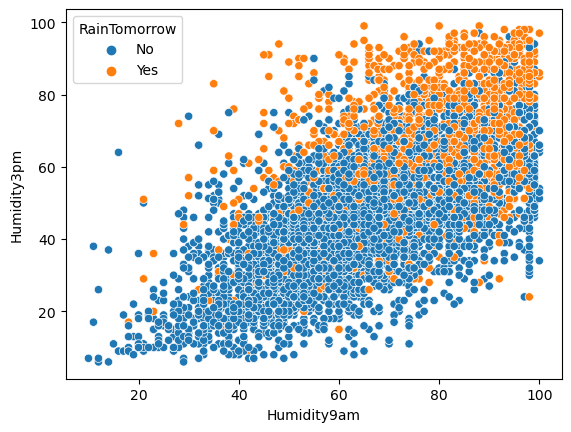

In [51]:
sns.scatterplot(x='Humidity9am',y='Humidity3pm',data=df,hue='RainTomorrow')
plt.show()

In [52]:
df.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

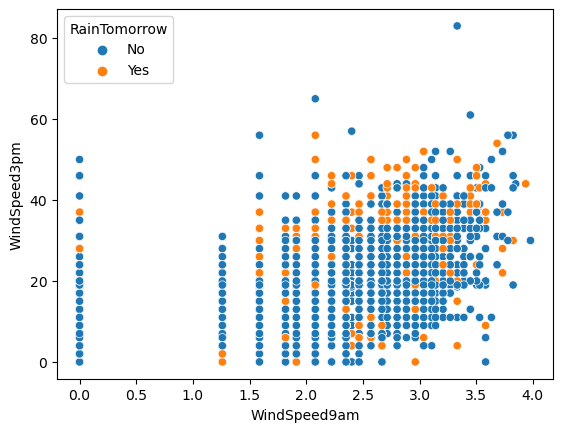

In [53]:
sns.scatterplot(x='WindSpeed9am',y='WindSpeed3pm',data=df,hue='RainTomorrow')
plt.show()

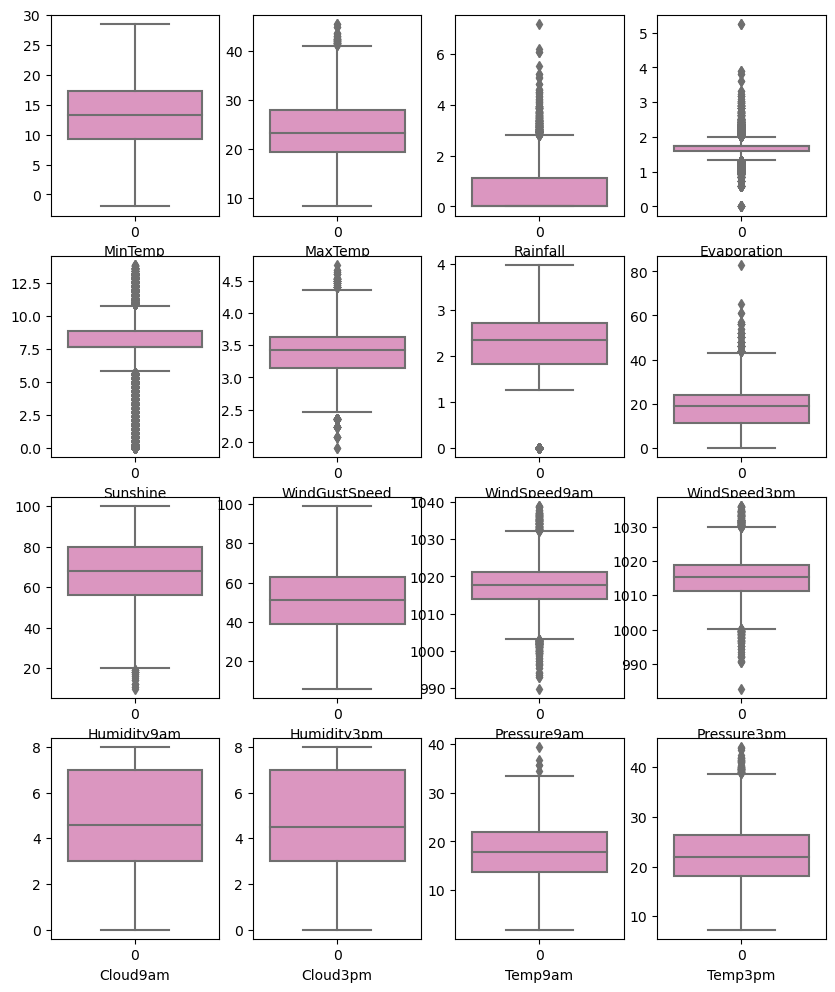

In [57]:
#letschecking outlier from boxplot method
plt.figure(figsize=(10,12))
p=1
for i in  numerical_col:
    if p<=16:
        plt.subplot(4,4,p)
        sns.boxplot(df[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()

we see that lot of outlier present in two columns spacially terefore its not much helpful for our model even its also possible to reduce performance of models hence we drop thiscolumns and traetother columns by specific method

In [12]:
from scipy.stats import zscore

out_features = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
                  'Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z= np.abs(zscore(out_features))
z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
Date,,,,,,,,,,,,
2008-12-01,1.570089e-01,0.292627,0.184155,3.143679e-16,0.383597,0.666038,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
2008-12-02,2.028121e-01,0.641376,0.184155,3.143679e-16,0.383597,0.677006,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2008-12-03,3.009450e-01,0.641376,0.184155,3.143679e-16,0.518289,0.611202,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
2008-12-04,6.771214e-01,0.641376,0.184155,3.143679e-16,1.267087,0.081593,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
2008-12-05,1.380408e+00,0.466007,0.184155,3.143679e-16,0.173684,0.289078,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,7.523137e-02,0.641376,0.184155,3.143679e-16,0.610540,0.233359,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
2017-06-22,2.355231e-01,0.641376,0.184155,3.143679e-16,1.477841,0.233359,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
2017-06-23,4.972110e-01,0.641376,0.184155,3.143679e-16,0.122781,0.089885,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099


In [13]:
#threshold=3
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   67,   68,   68,  123,  296,  381,  381,  405,  406,  407,
         407,  431,  462,  568,  568,  569,  602,  683,  683,  699,  713,
         748,  748,  796,  797,  802,  928,  935,  949,  979,  980, 1008,
        1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1203, 1237, 1241,
        1264, 1265, 1357, 1387, 1411, 1412, 1413, 1467, 1479, 1480, 1480,
        1481, 1513, 1587, 1644, 1661, 1665, 1673, 1680, 1774, 1819, 1898,
        2028, 2043, 2108, 2116, 2201, 2219, 2230, 2231, 2265, 2346, 2373,
        2389, 2429, 2488, 2527, 2527, 2541, 2593, 2676, 2677, 2710, 2735,
        2738, 2743, 2744, 2768, 2835, 2849, 2855, 2859, 2863, 2869, 2877,
        2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919,
        2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051,
        3058, 3059, 3059, 3060, 3067, 3082, 3098, 3099, 3101, 3139, 3141,
        3153, 3157, 3164, 3167, 3172, 

In [14]:
# now removing data above zscore and creating new dataframe
df1 = df[(z<3).all(axis=1)]
df1.shape

(8052, 21)

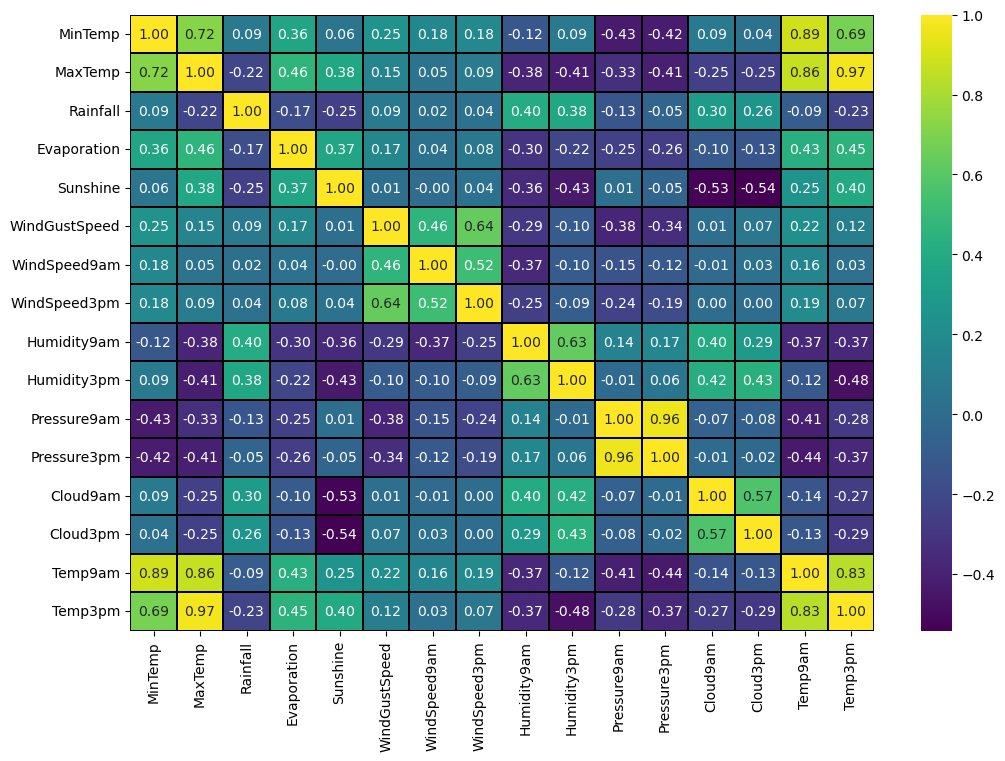

In [66]:
# thenwe checkthe coorelation between target and dependent variables
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'viridis')
plt.show()

we see thaat so much correlation to target variables but both positive and negative correlation obtain between feature variablesand age,no of education hoursper week columns are more correlated with target sothat we use all columns as features for understanding our model for prediction.and there more no,of columns are more correlated with  the label so that we
build model within all features.

In [15]:
# we see that from heatmap there are highly correlated columns occer so we rmove that for reducing multicolinearity issue
df1.drop(['Temp9am','Temp3pm'],axis=1,inplace=True)
print(df1.shape)

(8052, 19)


In [69]:
df1.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [16]:
df1['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
# there is targetvariable is in category so weconvertto int type
df1['RainToday']=df1['RainToday'].map({'No':0, 'Yes': 1})

In [18]:
df1['RainTomorrow']=df1['RainTomorrow'].map({'No':0, 'Yes': 1})

In [19]:
# there are lots of columns which isobject sothat we use encoding to encode them with labelencoder

from sklearn.preprocessing import LabelEncoder

In [20]:
for i in df1.columns:
    if df1[i].dtypes== 'object':
        encoder = LabelEncoder()
        df1[i] = encoder.fit_transform(df1[i])
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.900000,0.843433,1.753261,7.632205,13,3.530348,13,14,2.714418,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,0,0
2008-12-02,7.4,25.100000,0.000000,1.753261,7.632205,14,3.530348,6,15,1.587401,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,0,0
2008-12-03,12.9,25.700000,0.000000,1.753261,7.632205,15,3.583048,13,15,2.668402,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,0,0
2008-12-04,9.2,28.000000,0.000000,1.753261,7.632205,4,2.884499,9,0,2.223980,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,0,0
2008-12-05,17.5,32.300000,1.000000,1.753261,7.632205,13,3.448217,1,7,1.912931,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,2.8,23.400000,0.000000,1.753261,7.632205,0,3.141381,9,1,2.351335,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,0,0
2017-06-22,3.6,25.300000,0.000000,1.753261,7.632205,6,2.802039,9,3,2.351335,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,0,0
2017-06-23,5.4,26.900000,0.000000,1.753261,7.632205,3,3.332222,9,14,2.080084,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,0,0


In [21]:
# lets seperate the features and target variables
x = df1.drop('RainToday',axis=1)
y = df1['RainToday']

print(x.shape)
print(y.shape)

(8052, 18)
(8052,)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.843433,1.753261,7.632205,13,3.530348,13,14,2.714418,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,0
2008-12-02,7.4,25.1,0.000000,1.753261,7.632205,14,3.530348,6,15,1.587401,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,0
2008-12-03,12.9,25.7,0.000000,1.753261,7.632205,15,3.583048,13,15,2.668402,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,0
2008-12-04,9.2,28.0,0.000000,1.753261,7.632205,4,2.884499,9,0,2.223980,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,0
2008-12-05,17.5,32.3,1.000000,1.753261,7.632205,13,3.448217,1,7,1.912931,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0


In [23]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= 23)

In [28]:
# we see that there isimbalanceour target so we balance data sing smote method
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

Counter({0: 4397, 1: 4397})


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i
print('best accuracy is', maxaccu, 'at random state', maxrs)

best accuracy is 0.9482615894039735 at random state 162


In [31]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predet = etc.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predet))
print('\n')
print('cofusion_matrix :\n',confusion_matrix(y_test,predet))
print('\n')
print('classification_report :\n',classification_report(y_test,predet))

accuracy_score :
 0.9863410596026491


cofusion_matrix :
 [[1838   14]
 [  19  545]]


classification_report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1852
           1       0.97      0.97      0.97       564

    accuracy                           0.99      2416
   macro avg       0.98      0.98      0.98      2416
weighted avg       0.99      0.99      0.99      2416



In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddt = dtc.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,preddt))
print('cofusion_matrix :\n',confusion_matrix(y_test,preddt))
print('classification_report :\n',classification_report(y_test,preddt))

accuracy_score :
 1.0
cofusion_matrix :
 [[1852    0]
 [   0  564]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1852
           1       1.00      1.00      1.00       564

    accuracy                           1.00      2416
   macro avg       1.00      1.00      1.00      2416
weighted avg       1.00      1.00      1.00      2416



In [33]:
svc =  SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predsv))
print('cofusion_matrix :\n',confusion_matrix(y_test,predsv))
print('classification_report :\n',classification_report(y_test,predsv))

accuracy_score :
 0.7665562913907285
cofusion_matrix :
 [[1852    0]
 [ 564    0]]
classification_report :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      1852
           1       0.00      0.00      0.00       564

    accuracy                           0.77      2416
   macro avg       0.38      0.50      0.43      2416
weighted avg       0.59      0.77      0.67      2416



In [34]:
rf =  RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predrf))
print('cofusion_matrix :\n',confusion_matrix(y_test,predrf))
print('classification_report :\n',classification_report(y_test,predrf))

accuracy_score :
 0.9971026490066225
cofusion_matrix :
 [[1845    7]
 [   0  564]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1852
           1       0.99      1.00      0.99       564

    accuracy                           1.00      2416
   macro avg       0.99      1.00      1.00      2416
weighted avg       1.00      1.00      1.00      2416



In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predk = knn.predict(x_test)
print('accuracy_score :\n',accuracy_score(y_test,predk))
print('\n')
print('cofusion_matrix :\n',confusion_matrix(y_test,predk))
print('\n')
print('classification_report :\n',classification_report(y_test,predk))

accuracy_score :
 0.8344370860927153


cofusion_matrix :
 [[1737  115]
 [ 285  279]]


classification_report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1852
           1       0.71      0.49      0.58       564

    accuracy                           0.83      2416
   macro avg       0.78      0.72      0.74      2416
weighted avg       0.82      0.83      0.82      2416



we see that 100% accuracy achieved in decision tree model hence this model is best fit to our dataset hence proceed wiht
this model and  hence we genrate hyperperameter fot this model


In [36]:
from sklearn .model_selection import GridSearchCV

In [37]:
params_grid = {'criterion':['gini','entropy'], 'max_depth':[10,15,20],'min_samples_split': [8,5,10]}

In [39]:
search_cv1= GridSearchCV(DecisionTreeClassifier(),params_grid)
search_cv1.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [8, 5, 10]})

In [40]:
search_cv1.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8}

In [41]:
# then use this criteria for model and check how the increase accuracy

final_mod = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=8)
final_mod.fit(x_train,y_train)
pred_1 = final_mod.predict(x_test)
acc = accuracy_score(y_test,pred_1)
print('accuracy to our final model :\n',acc)

accuracy to our final model :
 1.0


In [42]:
# lets checking the roc auc graph for performance ofmodel
from sklearn import metrics
from sklearn.metrics import roc_auc_score

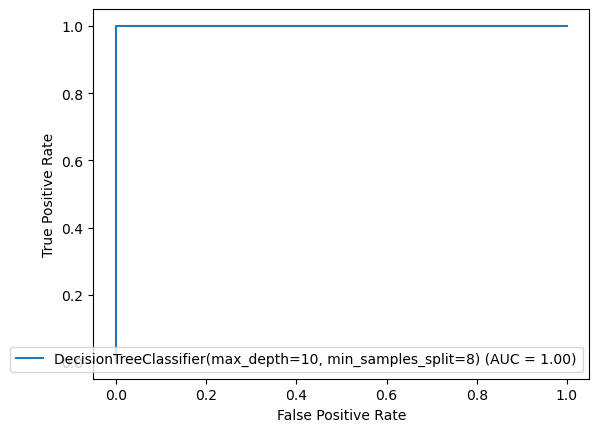

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_1)
roc_auc= metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name= final_mod)
display.plot()